# **Importing The Dataset**


First, we need to import the dataset. In this case we can use pandas library to easily import and manage the dataset. The datset contains 30 features. However, the dataset in csv is really messy and there are some empty columns. So, we need to specify the column that we want to retrieve by using the parameter "usecols"


In [ ]:
#importing dataset

import pandas as pd

raw_dataset = pd.read_csv( "dataset.csv", usecols=list(range(0,30)) ) # only take the first 30 columns

for col_name in raw_dataset.columns: 
    print(col_name)

raw_dataset.head(100)

id
host_id
host_name
host_response_time
host_response_rate
host_acceptance_rate
host_neighbourhood
host_listings_count
host_total_listings_count
neighbourhood
neighbourhood_cleansed
property_type
room_type
accommodates
bathrooms
bedrooms
beds
price
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
number_of_reviews
number_of_reviews_ltm
review_scores_rating
reviews_per_month


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4396219,18776800,LiveinAsia,within a few hours,100%,99%,Shibuya District,18,18,Suginami District,Suginami Ku,Apartment,Entire home/apt,5,1,1,2,"$13,477.00",2,"$2,000.00",6,1125,3,6,1125,1125,27,7,95,0.41
96,4396221,18776800,LiveinAsia,within a few hours,100%,99%,Shibuya District,18,18,Suginami District,Suginami Ku,Apartment,Entire home/apt,4,1,1,1,"$17,006.00",2,"$2,000.00",6,1125,3,6,1125,1125,22,4,91,0.36
97,4471640,22643572,Sachiko&Kurara,within a few hours,100%,93%,NaN,3,3,NaN,Higashimurayama Shi,House,Private room,2,1.5,1,4,"$3,744.00",1,"$2,590.00",4,1125,4,4,1125,1125,13,3,100,0.2
98,4471946,23202702,Teruko,within an hour,100%,98%,Kita District,1,1,Kita District,Kita Ku,Apartment,Entire home/apt,5,1,2,5,"$15,017.00",2,"$3,000.00",7,365,1,7,365,365,96,24,99,1.53


from those 30 features, we pick only 12 main features (randomly) and 2 target features, price and review score ratings. It is important to import the target values here because the target must also process the same preprocessing step with the main features

In [ ]:
#%% picking only 12 main features +2 target

selected_and_target_features = [
 'host_response_time',
 'host_acceptance_rate',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'price',
 'review_scores_rating']

used_dataset = pd.read_csv( "dataset.csv", usecols = selected_and_target_features )

used_dataset

,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,NaN,NaN,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",28,1125,18,94
1,within a few hours,88%,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",3,365,165,95
2,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",28,180,113,95
3,within a day,93%,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",28,720,103,95
4,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",28,180,103,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,NaN,NaN,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,365,0,NaN
13045,NaN,NaN,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,365,0,NaN
13046,within an hour,100%,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",28,30,0,NaN
13047,NaN,NaN,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,90,0,NaN


There are 13049 rows in totals and there are noticable null values in our dataset. We will deal with it in the next step.

# **Analyzing and Cleaning The Dataset**

In [ ]:
used_dataset.info()
used_dataset.head(125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      12199 non-null  object
 1   host_acceptance_rate    12729 non-null  object
 2   neighbourhood_cleansed  13019 non-null  object
 3   property_type           13048 non-null  object
 4   room_type               13045 non-null  object
 5   accommodates            13046 non-null  object
 6   bathrooms               13044 non-null  object
 7   bedrooms                13028 non-null  object
 8   beds                    13015 non-null  object
 9   price                   12847 non-null  object
 10  minimum_nights          13020 non-null  object
 11  maximum_nights          13020 non-null  object
 12  number_of_reviews       13049 non-null  object
 13  review_scores_rating    11075 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,NaN,NaN,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",28,1125,18,94
1,within a few hours,88%,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",3,365,165,95
2,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",28,180,113,95
3,within a day,93%,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",28,720,103,95
4,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",28,180,103,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,within an hour,100%,Minato Ku,Apartment,Private room,3,2,1,3,"$5,776.00",30,1095,7,89
121,within an hour,100%,Kita Ku,Apartment,Entire home/apt,5,1,1,4,"$4,385.00",3,1124,187,90
122,within a few hours,100%,Katsushika Ku,Apartment,Entire home/apt,4,1.5,2,4,"$13,049.00",5,30,283,98
123,We are married couple and brothers and daddy i...,100%,Katsushika District,f,Apartment,Entire home/apt,6,1.5,1,NaN,"$2,400.00",4,2020-04-29,2020-02-16


Our dataset contains various type of data. Some of which are nominal categorical (neighbourhood, property type, room type), some is ordinal categorical (response time), and the rest are numerical.

Also notice that some rows are containing invalid data, such as the row number 123. So, our task now is try to detect and delete those invalid rows. One way to detect it is by checking the unique value of one column. In this case, we try to check the unique value of column host_response_time and see which values is off/invalid


In [ ]:
host_response_time = pd.DataFrame(raw_dataset["host_response_time"].unique(), columns = ["Host Response Time Unique Values"])

with pd.option_context('display.max_rows', None):
    print(host_response_time)

                      Host Response Time Unique Values
0                                                  NaN
1                                   within a few hours
2                                         within a day
3                                       within an hour
4    We are married couple and brothers and daddy i...
5                                       私は､旅行と音楽が好きです｡
6    Hi! We're team Cookie House basing in Shinjyuk...
7                                             59139173
8    Hi! Nice to meet you.\nWe're a mother-daughter...
9    Hello and Konnichiwa! I am a Japanese female w...
10   Hello this is Takashi.\n\nThank you for look a...
11                                  a few days or more
12   Hello this is Shinichi.\n\nThank you for look ...
13   Hi! Welcome to my profile page! My name is Ryo...
14                                          2016-10-19
15                                Sumida, Tokyo, Japan
16   We are Japanese living in Tokyo Japan.\nI'm a ...
17   Hi th

After analyzing the values, we intuitively know that there are only 4 valid values: within a few hours, within a day, within an hour, and a few days or more (and also nan for null value). 

So, now we delete the rows that provide invalid data by checking each row whether the host_response_time is valid or not

In [ ]:
valid_host_response_time=["within an hour",
                          "within a few hours",
                          "within a day",
                          "a few days or more"]

# drop every row with invalid data


deleted_dataset = pd.DataFrame(columns = used_dataset.columns)
for index, row in used_dataset.iterrows():
    
    # drop if the value is not valid and the value is not null
    if (( row["host_response_time"] not in valid_host_response_time) and ( not pd.isna(row["host_response_time"]) )):
        deleted_dataset = deleted_dataset.append(row, ignore_index = True)
        used_dataset.drop(index, inplace=True)

deleted_dataset

,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,We are married couple and brothers and daddy i...,100%,Katsushika District,f,Apartment,Entire home/apt,6,1.5,1,NaN,"$2,400.00",4,2020-04-29,2020-02-16
1,私は､旅行と音楽が好きです｡,90%,Shinjuku District,t,Apartment,Entire home/apt,5,1,1,NaN,"$2,000.00",3,2020-04-28,2020-01-18
2,Hi! We're team Cookie House basing in Shinjyuk...,100%,Shinjuku District,t,Apartment,Entire home/apt,4,1,1,NaN,"$2,200.00",2,2020-04-28,2020-04-25
3,59139173,John,2,"Shibuya-ku, Japan",JP,Japan,35.67824,139.70864,t,1.5,NaN,NaN,t,26
4,59139173,John,2,"Shibuya-ku, Japan",JP,Japan,35.6769,139.70699,t,1,NaN,NaN,t,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,"Koto City, Tōkyō-to, Japan",within an hour,"江户川区, 東京都, Japan",139.88585,t,Apartment,Entire home/apt,4,1.5,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",2,"$2,000.00",89,NaN
244,"Koto City, Tōkyō-to, Japan",within an hour,"江户川区, 東京都, Japan",139.88603,t,Apartment,Entire home/apt,4,1,"{TV,Wifi,""Air conditioning"",Kitchen,Washer,""Sm...",2,"$2,000.00",89,NaN
245,Ikebukuro,Shibuya,NaN,97%,100%,f,https://a0.muscache.com/im/pictures/user/a2b0e...,https://a0.muscache.com/im/pictures/user/a2b0e...,Chiyoda District,t,Tōkyō-to,101-0031,Real Bed,NaN
246,2018-05-14,来日12年｡喜欢东京这个城市｡也希望来日旅游的各位都和我一样喜欢这里! \n希望大家可以玩得...,f,35.73695,139.70812,t,Apartment,Entire home/apt,3,Real Bed,"$5,000.00",2,90,2


So, there are 248 rows of data that contains invalid values. Now, we need to deal with the missing values. First, let's take a look at our dataset once again:

In [ ]:
used_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12801 entries, 0 to 13048
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      11951 non-null  object
 1   host_acceptance_rate    12497 non-null  object
 2   neighbourhood_cleansed  12790 non-null  object
 3   property_type           12800 non-null  object
 4   room_type               12797 non-null  object
 5   accommodates            12800 non-null  object
 6   bathrooms               12796 non-null  object
 7   bedrooms                12782 non-null  object
 8   beds                    12768 non-null  object
 9   price                   12744 non-null  object
 10  minimum_nights          12801 non-null  object
 11  maximum_nights          12793 non-null  object
 12  number_of_reviews       12801 non-null  object
 13  review_scores_rating    10844 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


the review_scores_rating, which is our target value, has the most null values (around 2000 null values). If we fill the 2000s missing value of the target value by its mean/median/mode , it could potentially misslead our model. So, it is better to drop the null values. 

In [ ]:
used_dataset = used_dataset.dropna()
used_dataset = used_dataset.reset_index(drop=True)

used_dataset.info()

used_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      10199 non-null  object
 1   host_acceptance_rate    10199 non-null  object
 2   neighbourhood_cleansed  10199 non-null  object
 3   property_type           10199 non-null  object
 4   room_type               10199 non-null  object
 5   accommodates            10199 non-null  object
 6   bathrooms               10199 non-null  object
 7   bedrooms                10199 non-null  object
 8   beds                    10199 non-null  object
 9   price                   10199 non-null  object
 10  minimum_nights          10199 non-null  object
 11  maximum_nights          10199 non-null  object
 12  number_of_reviews       10199 non-null  object
 13  review_scores_rating    10199 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,within a few hours,88%,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",3,365,165,95
1,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",28,180,113,95
2,within a day,93%,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",28,720,103,95
3,within a few hours,82%,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",28,180,103,96
4,within a day,93%,Setagaya Ku,House,Entire home/apt,3,1,2,2,"$8,045.00",28,720,44,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,within an hour,100%,Taito Ku,Apartment,Entire home/apt,9,1.5,3,5,"$24,026.00",2,1125,1,100
10195,within an hour,100%,Taito Ku,Apartment,Entire home/apt,7,1.5,3,4,"$19,951.00",2,1125,2,100
10196,within an hour,100%,Taito Ku,Apartment,Entire home/apt,7,1.5,2,4,"$19,951.00",2,1125,1,100
10197,within an hour,100%,Shinjuku Ku,Apartment,Entire home/apt,6,1.5,2,3,"$12,013.00",1,1125,1,100


After cleaning the data, there are 10199 rows left, which is still enough for training our model

Next, take a look at the value of host_acceptance_rate and price. It should be a numerical value, but it is treated as a string. So, our task is to convert the string into numerical. This can be done easily by string manipulation. And to convert the string into numerical, we use the help of pandas library



In [ ]:
used_dataset['host_acceptance_rate'] = used_dataset['host_acceptance_rate'].apply(lambda x : str(x).replace('%',''))

used_dataset['price'] = used_dataset['price'].apply(lambda x : str(x).replace('$','').replace(',', '').replace('.00','') )

used_dataset = used_dataset.apply(pd.to_numeric, errors='ignore')

used_dataset.info()

used_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      10199 non-null  object 
 1   host_acceptance_rate    10199 non-null  int64  
 2   neighbourhood_cleansed  10199 non-null  object 
 3   property_type           10199 non-null  object 
 4   room_type               10199 non-null  object 
 5   accommodates            10199 non-null  int64  
 6   bathrooms               10199 non-null  float64
 7   bedrooms                10199 non-null  int64  
 8   beds                    10199 non-null  int64  
 9   price                   10199 non-null  int64  
 10  minimum_nights          10199 non-null  int64  
 11  maximum_nights          10199 non-null  int64  
 12  number_of_reviews       10199 non-null  int64  
 13  review_scores_rating    10199 non-null  int64  
dtypes: float64(1), int64(9), object(4)
mem

,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,within a few hours,88,Sumida Ku,Apartment,Entire home/apt,2,1.0,1,2,11048,3,365,165,95
1,within a few hours,82,Nerima Ku,Apartment,Entire home/apt,2,1.0,1,1,4171,28,180,113,95
2,within a day,93,Setagaya Ku,Apartment,Entire home/apt,2,1.0,0,1,6952,28,720,103,95
3,within a few hours,82,Nerima Ku,Apartment,Entire home/apt,2,1.0,1,1,3957,28,180,103,96
4,within a day,93,Setagaya Ku,House,Entire home/apt,3,1.0,2,2,8045,28,720,44,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,within an hour,100,Taito Ku,Apartment,Entire home/apt,9,1.5,3,5,24026,2,1125,1,100
10195,within an hour,100,Taito Ku,Apartment,Entire home/apt,7,1.5,3,4,19951,2,1125,2,100
10196,within an hour,100,Taito Ku,Apartment,Entire home/apt,7,1.5,2,4,19951,2,1125,1,100
10197,within an hour,100,Shinjuku Ku,Apartment,Entire home/apt,6,1.5,2,3,12013,1,1125,1,100


# **Dealing With Outliers**

![outliers](https://miro.medium.com/max/1358/0*y7kVHEQPQKBg3Cga.)


in this step, we want to detect outliers. First, we calculate z score using this formula:

**$ z = \frac{x-\mu}{\sigma }$**

If the z score for the data is > 3 or < -3, it is considered as outlier (see the image above).

To deal with outliers:

if z socre > 3, set the value to the value where z = 3 

if z score <-3, set the value to the value where z = -3


In [ ]:
import numpy as np
cols = used_dataset.columns
numeric_cols = used_dataset._get_numeric_data().columns

for column_name in numeric_cols:
  factor = 3
  upper_lim = used_dataset[column_name].mean () + used_dataset[column_name].std () * factor
  lower_lim = used_dataset[column_name].mean () - used_dataset[column_name].std () * factor

  #used_dataset = used_dataset[(used_dataset[column_name] < upper_lim) & (used_dataset[column_name] > lower_lim)]

  used_dataset.loc[(used_dataset[column_name] > upper_lim),column_name] = upper_lim
  used_dataset.loc[(used_dataset[column_name] < lower_lim),column_name] = lower_lim 

used_dataset.info()

used_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      10199 non-null  object 
 1   host_acceptance_rate    10199 non-null  float64
 2   neighbourhood_cleansed  10199 non-null  object 
 3   property_type           10199 non-null  object 
 4   room_type               10199 non-null  object 
 5   accommodates            10199 non-null  float64
 6   bathrooms               10199 non-null  float64
 7   bedrooms                10199 non-null  float64
 8   beds                    10199 non-null  float64
 9   price                   10199 non-null  float64
 10  minimum_nights          10199 non-null  float64
 11  maximum_nights          10199 non-null  float64
 12  number_of_reviews       10199 non-null  float64
 13  review_scores_rating    10199 non-null  float64
dtypes: float64(10), object(4)
memory usage

,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,within a few hours,88.0,Sumida Ku,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,11048.0,3.0,365.0,165.0,95.0
1,within a few hours,82.0,Nerima Ku,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,4171.0,28.0,180.0,113.0,95.0
2,within a day,93.0,Setagaya Ku,Apartment,Entire home/apt,2.0,1.0,0.0,1.0,6952.0,28.0,720.0,103.0,95.0
3,within a few hours,82.0,Nerima Ku,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,3957.0,28.0,180.0,103.0,96.0
4,within a day,93.0,Setagaya Ku,House,Entire home/apt,3.0,1.0,2.0,2.0,8045.0,28.0,720.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,within an hour,100.0,Taito Ku,Apartment,Entire home/apt,9.0,1.5,3.0,5.0,24026.0,2.0,1125.0,1.0,100.0
10195,within an hour,100.0,Taito Ku,Apartment,Entire home/apt,7.0,1.5,3.0,4.0,19951.0,2.0,1125.0,2.0,100.0
10196,within an hour,100.0,Taito Ku,Apartment,Entire home/apt,7.0,1.5,2.0,4.0,19951.0,2.0,1125.0,1.0,100.0
10197,within an hour,100.0,Shinjuku Ku,Apartment,Entire home/apt,6.0,1.5,2.0,3.0,12013.0,1.0,1125.0,1.0,100.0


# **Encoding Categorical Data**

host_response_time is a categorical data with 4 unique values: "within an hour","within a few hours",  "within a day", "a few days or more". It is in fact an ordinal categorical data because it can be written as  "within an hour" < "within a few hours" < "within a day" < "a few days or more". So, we will ordinal encode the host_response_time values.

"within an hour" = 0 <br>
"within a few hours" = 1 <br>
"within a day" = 2 <br>
"a few days or more" = 3 <br>

In [ ]:
used_dataset["host_response_time"] = used_dataset["host_response_time"].apply(lambda x: valid_host_response_time.index(x))

used_dataset = used_dataset.apply(pd.to_numeric, errors='ignore')


used_dataset.info()

used_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      10199 non-null  int64  
 1   host_acceptance_rate    10199 non-null  float64
 2   neighbourhood_cleansed  10199 non-null  object 
 3   property_type           10199 non-null  object 
 4   room_type               10199 non-null  object 
 5   accommodates            10199 non-null  float64
 6   bathrooms               10199 non-null  float64
 7   bedrooms                10199 non-null  float64
 8   beds                    10199 non-null  float64
 9   price                   10199 non-null  float64
 10  minimum_nights          10199 non-null  float64
 11  maximum_nights          10199 non-null  float64
 12  number_of_reviews       10199 non-null  float64
 13  review_scores_rating    10199 non-null  float64
dtypes: float64(10), int64(1), object(3)
me

,host_response_time,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,1,88.0,Sumida Ku,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,11048.0,3.0,365.0,165.0,95.0
1,1,82.0,Nerima Ku,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,4171.0,28.0,180.0,113.0,95.0
2,2,93.0,Setagaya Ku,Apartment,Entire home/apt,2.0,1.0,0.0,1.0,6952.0,28.0,720.0,103.0,95.0
3,1,82.0,Nerima Ku,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,3957.0,28.0,180.0,103.0,96.0
4,2,93.0,Setagaya Ku,House,Entire home/apt,3.0,1.0,2.0,2.0,8045.0,28.0,720.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,0,100.0,Taito Ku,Apartment,Entire home/apt,9.0,1.5,3.0,5.0,24026.0,2.0,1125.0,1.0,100.0
10195,0,100.0,Taito Ku,Apartment,Entire home/apt,7.0,1.5,3.0,4.0,19951.0,2.0,1125.0,2.0,100.0
10196,0,100.0,Taito Ku,Apartment,Entire home/apt,7.0,1.5,2.0,4.0,19951.0,2.0,1125.0,1.0,100.0
10197,0,100.0,Shinjuku Ku,Apartment,Entire home/apt,6.0,1.5,2.0,3.0,12013.0,1.0,1125.0,1.0,100.0


Unlike host_response_time, the neighbourhood_cleansed, property_type, room_type are nominal categorical data. So, we will encode it using one hot encoding with pandas.

In [ ]:
used_dataset = pd.get_dummies(used_dataset, prefix_sep='_', drop_first = False)

used_dataset.info()

used_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host_response_time                          10199 non-null  int64  
 1   host_acceptance_rate                        10199 non-null  float64
 2   accommodates                                10199 non-null  float64
 3   bathrooms                                   10199 non-null  float64
 4   bedrooms                                    10199 non-null  float64
 5   beds                                        10199 non-null  float64
 6   price                                       10199 non-null  float64
 7   minimum_nights                              10199 non-null  float64
 8   maximum_nights                              10199 non-null  float64
 9   number_of_reviews                           10199 non-null  float64
 10  review_sco

,host_response_time,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,neighbourhood_cleansed_Adachi Ku,neighbourhood_cleansed_Akiruno Shi,neighbourhood_cleansed_Akishima Shi,neighbourhood_cleansed_Arakawa Ku,neighbourhood_cleansed_Bunkyo Ku,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chofu Shi,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Edogawa Ku,neighbourhood_cleansed_Fuchu Shi,neighbourhood_cleansed_Fussa Shi,neighbourhood_cleansed_Hachijo Machi,neighbourhood_cleansed_Hachioji Shi,neighbourhood_cleansed_Hamura Shi,neighbourhood_cleansed_Higashimurayama Shi,neighbourhood_cleansed_Higashiyamato Shi,neighbourhood_cleansed_Hino Shi,neighbourhood_cleansed_Hinohara Mura,neighbourhood_cleansed_Inagi Shi,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Kodaira Shi,neighbourhood_cleansed_Koganei Shi,neighbourhood_cleansed_Kokubunji Shi,neighbourhood_cleansed_Komae Shi,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Kunitachi Shi,neighbourhood_cleansed_Machida Shi,...,neighbourhood_cleansed_Ota Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinagawa Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Tama Shi,neighbourhood_cleansed_Toshima Ku,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,88.0,2.0,1.0,1.0,2.0,11048.0,3.0,365.0,165.0,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,82.0,2.0,1.0,1.0,1.0,4171.0,28.0,180.0,113.0,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,93.0,2.0,1.0,0.0,1.0,6952.0,28.0,720.0,103.0,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,82.0,2.0,1.0,1.0,1.0,3957.0,28.0,180.0,103.0,96.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,93.0,3.0,1.0,2.0,2.0,8045.0,28.0,720.0,44.0,96.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,0,100.0,9.0,1.5,3.0,5.0,24026.0,2.0,1125.0,1.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10195,0,100.0,7.0,1.5,3.0,4.0,19951.0,2.0,1125.0,2.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10196,0,100.0,7.0,1.5,2.0,4.0,19951.0,2.0,1125.0,1.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,

so, after encoding, our 12 main features are turned into 91 features.

# **Binning**

In question number 2, we are asked to predict the price of each listing using logistic regression. Personally, I think this is counter intuitive because logistic regression is used to predict categorical data (class) while price is numerical data. 

This also happens in question number 3-5. All the models are used for classification to predict the categorical data while the review_scores_rating is numerical.

So, to overcome this issue, we need to convert the numerical data into categorical data by binning.

For the price, we will use 5 number of bins

In [ ]:
print("without binning:\n", used_dataset["price"].value_counts() ,"\n\n")

from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
discretizer.fit( pd.DataFrame(used_dataset['price']) )
used_dataset['price'] = discretizer.transform(pd.DataFrame(used_dataset['price']))

print("with binning:\n", used_dataset['price'].value_counts() , "\n\n")

price_bin_details = list()
edges = discretizer.bin_edges_[0]
for i in range(0, len(edges)-1):
  detail = "$" + str(int(edges[i])) + " - $" + str(int(edges[i+1]))
  price_bin_details.append(detail)

price_bin_details = pd.DataFrame(price_bin_details, columns= ['price range'] )

price_bin_details

without binning:
 9975.0     405
49984.0    356
12013.0    272
19951.0    256
9947.0     232
          ... 
29068.0      1
32393.0      1
44835.0      1
18878.0      1
11977.0      1
Name: price, Length: 586, dtype: int64 


with binning:
 4.0    2094
1.0    2051
2.0    2040
0.0    2024
3.0    1990
Name: price, dtype: int64 




,price range
0,$0 - $5776
1,$5776 - $9761
2,$9761 - $13904
3,$13904 - $24992
4,$24992 - $251430


So, without binning, there are 586 number of classes for the price and some classes have significantly more occurance than the other ( \$9975 occured 405 times while \$11977 occured only once), making the dataset skewed for training. This is really bad for training our model, so that's why we did the binning. There are only 5 number of classes after binning and each of them has similar number of occurance.

Next we will do binning on the review score. The method and number of bins is the same as we did to the price.


In [ ]:
print("without binning:\n", used_dataset["review_scores_rating"].value_counts() ,"\n\n")

from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
discretizer.fit( pd.DataFrame(used_dataset['review_scores_rating']) )
used_dataset['review_scores_rating'] = discretizer.transform(pd.DataFrame(used_dataset['review_scores_rating']))

print("with binning:\n", used_dataset['review_scores_rating'].value_counts() , "\n\n")

review_bin_details = list()
edges = discretizer.bin_edges_[0]
for i in range(0, len(edges)-1):
  detail =  str(int(edges[i])) + " -" + str(int(edges[i+1]))
  review_bin_details.append(detail)

review_bin_details = pd.DataFrame(review_bin_details, columns= ['review score range'] )

review_bin_details

without binning:
 100.000000    1732
96.000000      793
95.000000      779
97.000000      778
98.000000      748
93.000000      720
94.000000      579
90.000000      522
99.000000      455
92.000000      422
91.000000      422
80.000000      356
89.000000      271
87.000000      261
88.000000      250
86.000000      145
85.000000      143
69.870912      142
83.000000      127
84.000000      127
82.000000       67
81.000000       58
73.000000       47
75.000000       42
70.000000       40
78.000000       38
77.000000       34
76.000000       33
79.000000       23
74.000000       16
71.000000       15
72.000000       14
Name: review_scores_rating, dtype: int64 


with binning:
 3.0    2319
4.0    2187
2.0    2078
0.0    1978
1.0    1637
Name: review_scores_rating, dtype: int64 




,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


# **Splitting The Dataset**

In this step, we will split the dataset into training set and test set. As mentioned in the question, the ration between training and test set will be 80:20. After that, we save both the training set and test set into a seperated csv files



In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(used_dataset, test_size=0.2, random_state=42)

print("train dataset size: ", train.shape)
print("test dataset size: ", test.shape)

train.to_csv("train.csv")
test.to_csv("test.csv")

train dataset size:  (8159, 93)
test dataset size:  (2040, 93)


Next, we seperate the main features with the targets

In [ ]:
X_train = pd.DataFrame(train.drop(["price","review_scores_rating"], axis=1))
X_test = pd.DataFrame(test.drop(["price","review_scores_rating"], axis=1))

Y_price_train = pd.DataFrame(train["price"])
Y_price_test = pd.DataFrame(test["price"])

Y_review_score_train = pd.DataFrame(train["review_scores_rating"])
Y_review_score_test = pd.DataFrame(test["review_scores_rating"])


# **Feature Scaling**

Next we, scale our feature so that no feature is dominating other features. In this case, we use minmaxscaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame( scaler.fit_transform(X_train.values), index = X_train.index, columns = X_train.columns)
X_test_scaled = pd.DataFrame( scaler.fit_transform(X_test.values), index = X_test.index, columns = X_train.columns)

X_train_scaled

,host_response_time,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,neighbourhood_cleansed_Adachi Ku,neighbourhood_cleansed_Akiruno Shi,neighbourhood_cleansed_Akishima Shi,neighbourhood_cleansed_Arakawa Ku,neighbourhood_cleansed_Bunkyo Ku,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chofu Shi,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Edogawa Ku,neighbourhood_cleansed_Fuchu Shi,neighbourhood_cleansed_Fussa Shi,neighbourhood_cleansed_Hachijo Machi,neighbourhood_cleansed_Hachioji Shi,neighbourhood_cleansed_Hamura Shi,neighbourhood_cleansed_Higashimurayama Shi,neighbourhood_cleansed_Higashiyamato Shi,neighbourhood_cleansed_Hino Shi,neighbourhood_cleansed_Hinohara Mura,neighbourhood_cleansed_Inagi Shi,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Kodaira Shi,neighbourhood_cleansed_Koganei Shi,neighbourhood_cleansed_Kokubunji Shi,neighbourhood_cleansed_Komae Shi,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Kunitachi Shi,neighbourhood_cleansed_Machida Shi,neighbourhood_cleansed_Meguro Ku,neighbourhood_cleansed_Minato Ku,...,neighbourhood_cleansed_Ota Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinagawa Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Tama Shi,neighbourhood_cleansed_Toshima Ku,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
8161,0.000000,1.000000,0.458669,0.221254,0.171290,0.278591,0.000000,0.323843,0.012150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8696,0.000000,1.000000,0.076445,0.221254,0.171290,0.000000,0.437919,1.000000,0.018225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6044,0.000000,0.957693,0.458669,0.221254,0.342580,0.278591,0.673721,0.177046,0.012150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5419,0.000000,0.830770,0.382224,0.221254,0.171290,0.464318,0.067372,1.000000,0.115424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4196,0.000000,1.000000,0.076445,0.221254,0.171290,0.092864,0.000000,0.026690,0.127574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

# **1. Feature Engineering and Feature Selection**

For the feature extraction, we only need to do it once because all features used in here is the same. But, for the feature selection, we need to do it twice, for the price and review score.

## **Feature Extraction (PCA)**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_train_scaled_pca = pd.DataFrame(X_train_scaled_pca, index= X_train_scaled.index, columns= ["pc_" + str(i) for i in range(1,X_train_scaled_pca.shape[1]+1 ) ] )

X_test_scaled_pca = pca.transform(X_test_scaled)
X_test_scaled_pca = pd.DataFrame(X_test_scaled_pca, index= X_test_scaled.index, columns= ["pc_" + str(i) for i in range(1,X_test_scaled_pca.shape[1]+1 ) ] )



X_train_scaled_pca

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40,...,pc_52,pc_53,pc_54,pc_55,pc_56,pc_57,pc_58,pc_59,pc_60,pc_61,pc_62,pc_63,pc_64,pc_65,pc_66,pc_67,pc_68,pc_69,pc_70,pc_71,pc_72,pc_73,pc_74,pc_75,pc_76,pc_77,pc_78,pc_79,pc_80,pc_81,pc_82,pc_83,pc_84,pc_85,pc_86,pc_87,pc_88,pc_89,pc_90,pc_91
8161,-0.521886,0.021628,-0.370745,-0.227131,-0.301998,0.585724,-0.551972,0.088788,0.163348,0.015586,0.081918,0.118516,-0.117143,-0.005368,0.022558,0.020442,0.014450,-0.022546,0.021743,0.025211,-0.001510,-0.017147,-0.011511,-0.001771,-0.004370,0.018582,0.017222,0.016607,-0.064122,0.023992,-0.007553,0.000446,0.029375,0.001439,0.006630,0.000037,0.003231,-0.022191,-0.018120,-0.036205,...,-0.000282,-0.000172,0.000451,-0.002274,0.002886,0.001005,-0.001523,-0.001403,-0.001940,-0.002659,0.000385,0.000469,-0.000548,0.000810,-0.000715,-0.000793,-0.000297,-0.000421,-0.000381,0.000158,0.000662,0.000280,0.000317,-0.000152,0.000679,0.000466,-0.000218,0.000356,-0.000231,-0.000148,0.000315,0.000075,-0.000346,0.000155,-4.072973e-16,2.080889e-18,-6.215813e-17,-8.894344e-18,-6.776162e-18,4.176323e-20
8696,0.432355,-0.901422,0.563946,-0.258201,-0.510666,-0.182055,-0.013168,-0.014451,0.049089,-0.257155,-0.320886,-0.159049,-0.147984,0.045479,-0.103115,-0.262918,0.811289,0.240030,-0.202630,0.227024,0.062709,0.033860,-0.114255,-0.069547,0.010067,0.050648,-0.030014,-0.036705,0.011151,0.012494,-0.004435,-0.018374,-0.044659,-0.009608,-0.015710,-0.061274,0.109861,-0.087275,-0.030368,0.004025,...,-0.004319,0.001562,0.004099,0.005416,-0.000608,-0.000653,0.002007,0.002444,-0.004654,-0.000035,-0.000977,-0.000741,-0.000530,-0.002704,0.000724,-0.001392,0.002677,0.000284,-0.000367,0.000623,0.000447,0.001412,-0.001156,0.000504,-0.000449,0.000260,0.001017,-0.000848,0.000508,0.000603,0.000070,-0.000588,-0.000100,-0.000302,-3.934195e-16,-8.292056e-17,1.473097e-16,-5.152152e-18,-2.269470e-18,7.366057e-18
6044,0.359169,0.982469,-0.366283,0.024083,-0.397007,0.634608,-0.455347,-0.111374,-0.212530,-0.167991,-0.007067,0.446024,-0.056826,0.389822,0.340487,-0.225932,0.052576,0.004877,-0.170866,0.083939,-0.038101,-0.047974,0.000577,0.038567,0.009932,-0.036473,0.025946,-0.016487,-0.106485,0.045272,-0.044433,0.009822,-0.034567,-0.021580,-0.000785,-0.060282,0.026614,-0.053037,-0.003139,-0.026119,...,-0.001409,0.003291,0.001919,0.000406,0.003677,0.003765,-0.003704,0.001433,0.001891,-0.003406,0.000049,-0.001559,0.000475,-0.002625,-0.003310,-0.000420,-0.000301,-0.001081,0.001544,0.000283,0.000695,0.000384,0.000222,-0.000823,0.000959,0.000191,0.000164,-0.000333,0.000776,0.001061,0.000159,0.000035,0.000330,-0.000049,-2.407638e-16,-4.858005e-18,-6.215813e-17,5.579755e-18,-4.649193e-19,-1.260973e-18
5419,1.062548,-0.170729,0.536101,-0.192289,-0.157729,0.020940,-0.025335,0.105822,0.211441,0.288794,-0.771453,-0.046784,0.397272,-0.395004,-0.175065,-0.159687,-0.108566,-0.079605,0.081559,-0.327255,-0.148870,0.817622,-0.377727,-0.272991,-0.005624,0.346030,-0.000911,0.054839,-0.153502,0.101434,-0.014774,-0.053967,0.077609,-0.046883,-0.062793,0.059691,-0.082616,-0.074337,0.011813,0.044065,...,-0.000896,0.001709,0.003090,-0.004726,-0.006180,-0.000113,0.002193,0.001936,-0.001823,0.001836,-0.000859,-0.000067,-0.001790,0.001644,0.001669,-0.002418,0.001130,0.002052,0.000683,0.000036,0.000113,-0.000822,0.000023,0.002633,-0.000391,0.001449,0.000381,-0.000227,-0.000541,0.000520,0.000604,0.000097,-0.000210,0.000139,-2.823972e-16,7.285060e-18,-5.044875e-17,9.079974e-17,4.335693e-18,-3.027609e-17
4196,-0.573711,-0.306009,-0.228528,0.891910,0.213420,0.073215,-0.129786,-0.023622,-0.158191,0.051523,-0.004938,0.024545,-0.095130,0.033707,0.029978,0.018074,0.015157,-0.055064,-0.011908,0.029389,-0.042403,-0.001177,0.005134,0.017151,-0.000535,-0.006097,-0.008731,-0.007324,0.017992,-0.024231,0.007327,0.011664,-0.017223,-0.002121,0.005250,-0.003

## **Feature Selection - price**

in this step, we want to know which principal components correlate with price the most. To decide that, we pick every principal componont which has >= 0.05 correlation coefficient with the price.

The final result is only 20 principal components kept

In [ ]:
train_dataset_pca_price = pd.concat([X_train_scaled_pca,Y_price_train], axis=1, sort=False)

correlation_matrix = train_dataset_pca_price.corr()
correlation = pd.DataFrame( correlation_matrix.abs().sort_values(["price"], ascending = False )["price"] , columns =["price"])

with pd.option_context('display.max_rows', None):
    print("the absoulute correlation:\n", correlation, "\n\n")

selected_features_df = correlation[correlation.price >= 0.05 ]
selected_features_df = selected_features_df.drop("price", axis='index')

with pd.option_context('display.max_rows', None):
    print("selected features:\n", selected_features_df, "\n\n")

selected_features_price =  selected_features_df.index.to_list()

engineered_features_train_price = X_train_scaled_pca[selected_features_price].copy()
engineered_features_test_price= X_test_scaled_pca[selected_features_price].copy()

engineered_features_train_price

the absoulute correlation:
           price
price  1.000000
pc_2   0.353687
pc_1   0.295906
pc_9   0.255457
pc_86  0.223441
pc_16  0.128193
pc_6   0.127042
pc_3   0.117598
pc_10  0.117061
pc_88  0.112596
pc_8   0.106602
pc_11  0.102456
pc_7   0.098703
pc_41  0.092595
pc_5   0.089458
pc_21  0.079442
pc_48  0.070307
pc_14  0.062601
pc_38  0.053549
pc_87  0.052331
pc_26  0.050357
pc_15  0.047992
pc_13  0.047829
pc_32  0.045433
pc_29  0.045064
pc_36  0.043175
pc_12  0.041669
pc_4   0.041048
pc_24  0.039859
pc_89  0.039274
pc_37  0.037856
pc_90  0.036038
pc_22  0.035701
pc_27  0.034723
pc_18  0.034563
pc_44  0.033110
pc_40  0.031947
pc_19  0.031925
pc_91  0.029242
pc_33  0.029229
pc_56  0.027067
pc_43  0.026772
pc_47  0.025825
pc_17  0.025582
pc_57  0.025374
pc_30  0.025315
pc_20  0.022962
pc_60  0.021220
pc_35  0.018975
pc_53  0.018427
pc_69  0.018354
pc_50  0.016483
pc_62  0.016326
pc_46  0.015033
pc_45  0.014703
pc_70  0.014390
pc_75  0.013864
pc_63  0.012584
pc_51  0.010603
pc_49  0.009

,pc_2,pc_1,pc_9,pc_86,pc_16,pc_6,pc_3,pc_10,pc_88,pc_8,pc_11,pc_7,pc_41,pc_5,pc_21,pc_48,pc_14,pc_38,pc_87,pc_26
8161,0.021628,-0.521886,0.163348,-4.072973e-16,0.020442,0.585724,-0.370745,0.015586,-6.215813e-17,0.088788,0.081918,-0.551972,-0.129526,-0.301998,-0.001510,0.000420,-0.005368,-0.022191,2.080889e-18,0.018582
8696,-0.901422,0.432355,0.049089,-3.934195e-16,-0.262918,-0.182055,0.563946,-0.257155,1.473097e-16,-0.014451,-0.320886,-0.013168,-0.007964,-0.510666,0.062709,-0.009125,0.045479,-0.087275,-8.292056e-17,0.050648
6044,0.982469,0.359169,-0.212530,-2.407638e-16,-0.225932,0.634608,-0.366283,-0.167991,-6.215813e-17,-0.111374,-0.007067,-0.455347,-0.060196,-0.397007,-0.038101,-0.005400,0.389822,-0.053037,-4.858005e-18,-0.036473
5419,-0.170729,1.062548,0.211441,-2.823972e-16,-0.159687,0.020940,0.536101,0.288794,-5.044875e-17,0.105822,-0.771453,-0.025335,-0.080769,-0.157729,-0.148870,-0.009120,-0.395004,-0.074337,7.285060e-18,0.346030
4196,-0.306009,-0.573711,-0.158191,-4.647480e-17,0.018074,0.073215,-0.228528,0.051523,-1.011643e-17,-0.023622,-0.004938,-0.129786,0.052497,0.213420,-0.042403,-0.000954,0.033707,0.018765,8.534762e-17,-0.006097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.592406,0.070910,0.053522,-1.852527e-16,-0.009999,0.074769,0.101280,0.448034,1.399372e-16,0.829354,-0.195681,0.499112,-0.171015,0.108089,-0.011518,0.004197,-0.021850,0.098709,-6.036916e-17,-0.469636
5191,0.097350,-0.549699,0.114840,-3.517861e-16,0.011813,-0.132140,0.203532,0.179647,1.763915e-17,0.837936,0.056749,0.438560,-0.032338,-0.131177,0.026750,-0.002053,0.046057,0.018180,-6.730805e-17,0.066414
5390,0.027592,-0.495885,0.121094,2.451527e-15,0.032869,-0.073320,0.265788,-0.260151,3.845583e-17,0.020996,-0.032188,0.116324,0.171384,-0.065255,-0.033415,-0.024552,-0.119863,-0.038020,5.759204e-17,-0.070361
860,-0.171199,-0.469505,0.079244,9.036350e-18,0.091713,-0.199503,-0.592243,0.473254,-7.256647e-17,-0.743204,0.483891,0.460383,-0.034766,-0.378205,0.004608,-0.002972,0.069221,0.008634,8.534762e-17,-0.032011


## **Feature Selection - review score**

in this step, we want to know which principal components correlate with review score the most. To decide that, we pick every principal componont which has >= 0.02 correlation coefficient with the review score.

The final result is only 34 principal components kept

In [ ]:
train_dataset_pca_review = pd.concat([X_train_scaled_pca,Y_review_score_train], axis=1, sort=False)

correlation_matrix = train_dataset_pca_review.corr()

correlation = pd.DataFrame( correlation_matrix.abs().sort_values(["review_scores_rating"], ascending = False )["review_scores_rating"] , columns =["review_scores_rating"])

with pd.option_context('display.max_rows', None):
    print("the absoulute correlation:\n", correlation, "\n\n")

selected_features_df = correlation[correlation.review_scores_rating >= 0.02 ]
selected_features_df = selected_features_df.drop("review_scores_rating", axis='index')

with pd.option_context('display.max_rows', None):
    print("selected features:\n", selected_features_df, "\n\n")

selected_features_review =  selected_features_df.index.to_list()

engineered_features_train_review = X_train_scaled_pca[selected_features_review].copy()
engineered_features_test_review = X_test_scaled_pca[selected_features_review].copy()

engineered_features_train_review

the absoulute correlation:
                       review_scores_rating
review_scores_rating              1.000000
pc_2                              0.114903
pc_6                              0.068285
pc_11                             0.066227
pc_1                              0.065267
pc_10                             0.062080
pc_3                              0.058474
pc_88                             0.054718
pc_41                             0.046926
pc_16                             0.046009
pc_28                             0.043465
pc_26                             0.039072
pc_51                             0.029168
pc_24                             0.028826
pc_7                              0.028454
pc_27                             0.028409
pc_8                              0.028259
pc_33                             0.027468
pc_48                             0.027221
pc_14                             0.027203
pc_9                              0.026851
pc_35                     

,pc_2,pc_6,pc_11,pc_1,pc_10,pc_3,pc_88,pc_41,pc_16,pc_28,pc_26,pc_51,pc_24,pc_7,pc_27,pc_8,pc_33,pc_48,pc_14,pc_9,pc_35,pc_4,pc_58,pc_23,pc_40,pc_18,pc_17,pc_82,pc_65,pc_13,pc_20,pc_37,pc_62,pc_52
8161,0.021628,0.585724,0.081918,-0.521886,0.015586,-0.370745,-6.215813e-17,-0.129526,0.020442,0.016607,0.018582,-0.001133,-0.001771,-0.551972,0.017222,0.088788,0.029375,0.000420,-0.005368,0.163348,0.006630,-0.227131,-0.001523,-0.011511,-0.036205,-0.022546,0.014450,0.000315,0.000810,-0.117143,0.025211,0.003231,0.000385,-0.000282
8696,-0.901422,-0.182055,-0.320886,0.432355,-0.257155,0.563946,1.473097e-16,-0.007964,-0.262918,-0.036705,0.050648,0.005872,-0.069547,-0.013168,-0.030014,-0.014451,-0.044659,-0.009125,0.045479,0.049089,-0.015710,-0.258201,0.002007,-0.114255,0.004025,0.240030,0.811289,0.000070,-0.002704,-0.147984,0.227024,0.109861,-0.000977,-0.004319
6044,0.982469,0.634608,-0.007067,0.359169,-0.167991,-0.366283,-6.215813e-17,-0.060196,-0.225932,-0.016487,-0.036473,-0.000207,0.038567,-0.455347,0.025946,-0.111374,-0.034567,-0.005400,0.389822,-0.212530,-0.000785,0.024083,-0.003704,0.000577,-0.026119,0.004877,0.052576,0.000159,-0.002625,-0.056826,0.083939,0.026614,0.000049,-0.001409
5419,-0.170729,0.020940,-0.771453,1.062548,0.288794,0.536101,-5.044875e-17,-0.080769,-0.159687,0.054839,0.346030,0.003598,-0.272991,-0.025335,-0.000911,0.105822,0.077609,-0.009120,-0.395004,0.211441,-0.062793,-0.192289,0.002193,-0.377727,0.044065,-0.079605,-0.108566,0.000604,0.001644,0.397272,-0.327255,-0.082616,-0.000859,-0.000896
4196,-0.306009,0.073215,-0.004938,-0.573711,0.051523,-0.228528,-1.011643e-17,0.052497,0.018074,-0.007324,-0.006097,-0.002804,0.017151,-0.129786,-0.008731,-0.023622,-0.017223,-0.000954,0.033707,-0.158191,0.005250,0.891910,-0.001170,0.005134,0.007329,-0.055064,0.015157,-0.000255,0.000149,-0.095130,0.029389,0.020709,-0.001412,0.000775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.592406,0.074769,-0.195681,0.070910,0.448034,0.101280,1.399372e-16,-0.171015,-0.009999,-0.020538,-0.469636,0.000057,0.148679,0.499112,-0.059832,0.829354,-0.213143,0.004197,-0.021850,0.053522,-0.050898,-0.258293,-0.000320,0.013552,0.666011,0.018825,-0.021962,0.000547,0.000233,0.078117,0.014458,0.387179,0.000568,0.001214
5191,0.097350,-0.132140,0.056749,-0.549699,0.179647,0.203532,1.763915e-17,-0.032338,0.011813,0.000595,0.066414,-0.000717,-0.042089,0.438560,0.031006,0.837936,0.072543,-0.002053,0.046057,0.114840,0.018109,-0.348757,0.001726,-0.020661,0.064124,0.017029,0.005083,0.001880,-0.000412,-0.161245,0.016295,-0.130899,-0.000045,0.000154
5390,0.027592,-0.073320,-0.032188,-0.495885,-0.260151,0.265788,3.845583e-17,0.171384,0.032869,0.168403,-0.070361,0.008202,-0.014581,0.116324,0.042044,0.020996,-0.085890,-0.024552,-0.119863,0.121094,0.246230,-0.276287,-0.002006,0.102988,-0.094757,-0.008107,-0.044005,0.001188,0.001351,-0.006106,-0.126604,-0.144869,0.002353,0.005751
860,-0.171199,-0.199503,0.483891,-0.469505,0.473254,-0.592243,-7.256647e-17,-0.034766,0.091713,0.018926,-0.032011,-0.003791,0.017139,0.460383,-0.001877,-0.743204,0.018469,-0.002972,0.069221,0.079244,-0.105512,0.100936,-0.001809,0.022451,0.011151,0.035242,0.004223,-0.000935,0.001743,0.413029,0.002465,-0.078986,-0.003358,-0.000581


# **2.Logistic Regression**

The metris that I use are :


*   overall accuracy, which is obtained from the total number of correct predictions divided by total number of predictions.
*   precision, which is is the total number of correctly predicted class divided by the total number of that actual class.
*   recall, which is the total number of correctly predicted class divided by the total number of that predicted class

and also confusion matrix to viuslize the result

## **without feature engineering**

### **training**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train_scaled,Y_price_train)
Y_price_predict = clf.predict(X_test_scaled)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **evaluation**

price range of class x :



,price range
0,$0 - $5776
1,$5776 - $9761
2,$9761 - $13904
3,$13904 - $24992
4,$24992 - $251430


              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67       434
         1.0       0.37      0.45      0.41       387
         2.0       0.35      0.34      0.35       410
         3.0       0.42      0.27      0.33       382
         4.0       0.49      0.54      0.52       427

    accuracy                           0.46      2040
   macro avg       0.46      0.46      0.45      2040
weighted avg       0.46      0.46      0.46      2040

confusion matrix:
 [[296  85  30  11  12]
 [ 78 175  95  25  14]
 [ 41 123 141  43  62]
 [ 13  48  68 104 149]
 [ 21  41  72  62 231]] 




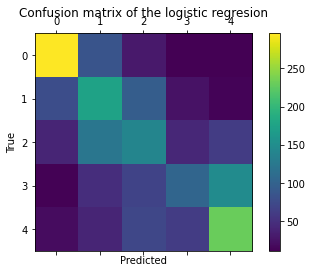

In [ ]:
from IPython.display import display

print("price range of class x :\n")

display(price_bin_details)



from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_price_test, Y_price_predict)

print(report)


cm = confusion_matrix( Y_price_test, Y_price_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regresion')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

after several attempts, the model mostly reach about 46% accuracy. Considering that the selected feature is random, this result is good enough and absoulutely better than just guessing the price.

## **with feature engineering**

### **training**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 10000)
clf.fit(engineered_features_train_price,Y_price_train)
Y_price_predict = clf.predict(engineered_features_test_price)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **evaluation**

price range of class x :



,price range
0,$0 - $5776
1,$5776 - $9761
2,$9761 - $13904
3,$13904 - $24992
4,$24992 - $251430


              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61       434
         1.0       0.35      0.43      0.39       387
         2.0       0.32      0.31      0.32       410
         3.0       0.41      0.24      0.30       382
         4.0       0.45      0.52      0.49       427

    accuracy                           0.43      2040
   macro avg       0.43      0.43      0.42      2040
weighted avg       0.43      0.43      0.43      2040

confusion matrix:
 [[274 106  31  12  11]
 [ 95 166  88  14  24]
 [ 50 115 127  45  73]
 [ 23  39  70  92 158]
 [ 17  48  76  64 222]] 




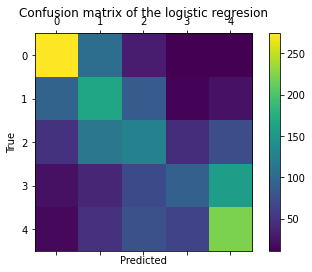

In [ ]:
from IPython.display import display

print("price range of class x :\n")

display(price_bin_details)



from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_price_test, Y_price_predict)

print(report)


cm = confusion_matrix( Y_price_test, Y_price_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regresion')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**after several attempts, the model mostly reach about 43% accuracy, which is around 3% lower than without feature engineering and selection. But, keep in mind that the features has been reduced almost up to 20% of the original features. So, although the accuracy is a bit lower, the training and prediction is faster compared to without feature engineering and feature selection**

# **3.K Nearest Neighbours**

The metris that I use are :


*   overall accuracy, which is obtained from the total number of correct predictions divided by total number of predictions.
*   precision, which is is the total number of correctly predicted class divided by the total number of that actual class.
*   recall, which is the total number of correctly predicted class divided by the total number of that predicted class

and also confusion matrix to viuslize the result

## **without feature engineering**

### **training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=300 )
knn.fit(X_train_scaled, Y_review_score_train)

Y_review_score_predict = knn.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.29      0.48      0.36       404
         1.0       0.20      0.01      0.02       320
         2.0       0.29      0.11      0.16       428
         3.0       0.32      0.47      0.38       463
         4.0       0.34      0.41      0.37       425

    accuracy                           0.31      2040
   macro avg       0.29      0.30      0.26      2040
weighted avg       0.29      0.31      0.27      2040

confusion matrix:
 [[193   2  25  87  97]
 [116   4  30 110  60]
 [132   4  47 157  88]
 [101   7  39 219  97]
 [121   3  20 107 174]] 




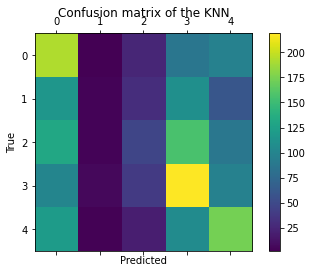

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the KNN')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

after several attempts, the model mostly reach about 31% accuracy, which is pretty bad. Also, the recall score for review between 89-93 is only 1%. This could be happened because the randomly selected feature is not strongly related with the review score. But, it is still better than just guessing the review score.

**Compared to other methods, KNN has the worst accuracy. For the precision and recall score, it is similar as SVM method, but worse than classification tree method. So, I think KNN is not suitable for this problem.**

## **with feature engineering**

### **training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=300 )
knn.fit(engineered_features_train_review, Y_review_score_train)

Y_review_score_predict = knn.predict(engineered_features_test_review)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.29      0.39      0.33       404
         1.0       0.13      0.01      0.01       320
         2.0       0.24      0.11      0.16       428
         3.0       0.30      0.43      0.35       463
         4.0       0.31      0.45      0.36       425

    accuracy                           0.29      2040
   macro avg       0.25      0.28      0.24      2040
weighted avg       0.26      0.29      0.26      2040

confusion matrix:
 [[156   3  39  89 117]
 [ 96   2  39 108  75]
 [113   3  49 156 107]
 [ 84   6  43 200 130]
 [ 89   1  32 113 190]] 




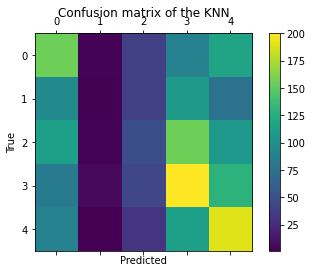

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the KNN')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**after several attempts, the model mostly reach about 29% accuracy, which is around 2% lower than without feature engineering and selection. But, keep in mind that the features has been reduced to almost 40% of the original features. So, although the accuracy is a bit lower, the training and prediction is faster compared to without feature engineering and feature selection**

# **4. Suppport Vector Machine**

The metris that I use are :


*   overall accuracy, which is obtained from the total number of correct predictions divided by total number of predictions.
*   precision, which is is the total number of correctly predicted class divided by the total number of that actual class.
*   recall, which is the total number of correctly predicted class divided by the total number of that predicted class

and also confusion matrix to viuslize the result

## **without feature engineering**

### **training**

In [ ]:
from sklearn import svm

svm_model =  svm.SVC()

svm_model.fit(X_train_scaled, Y_review_score_train)

Y_review_score_predict = svm_model.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.35      0.49      0.41       404
         1.0       0.24      0.03      0.06       320
         2.0       0.37      0.16      0.23       428
         3.0       0.37      0.48      0.42       463
         4.0       0.37      0.56      0.45       425

    accuracy                           0.36      2040
   macro avg       0.34      0.35      0.31      2040
weighted avg       0.35      0.36      0.33      2040

confusion matrix:
 [[198   6  30  58 112]
 [ 95  11  34  93  87]
 [101  14  70 152  91]
 [ 76  10  39 223 115]
 [ 93   5  16  72 239]] 




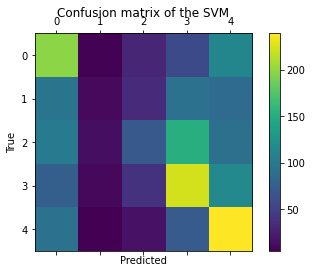

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the SVM')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

after several attempts, the model mostly reach about 36% accuracy, which is pretty bad. Also, the recall score for review between 89-93 is only 3%. This could be happened because the randomly selected feature is not strongly related with the review score. But, it is still better than just guessing the review score.

**compared to other methods, the SVM reached highest overall accuracy, but only slight difference betweeen decision tree's accuracy. Moreover, the recall score for class 1 is too bad. So, think it is the second best method for this particular dataset.**

## **with feature engineering**

### **training**

In [ ]:
from sklearn import svm

svm_model =  svm.SVC()

svm_model.fit(engineered_features_train_review, Y_review_score_train)

Y_review_score_predict = svm_model.predict(engineered_features_test_review)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.35      0.47      0.40       404
         1.0       0.25      0.05      0.08       320
         2.0       0.35      0.18      0.24       428
         3.0       0.36      0.45      0.40       463
         4.0       0.37      0.54      0.44       425

    accuracy                           0.35      2040
   macro avg       0.34      0.34      0.31      2040
weighted avg       0.34      0.35      0.33      2040

confusion matrix:
 [[190  15  33  56 110]
 [ 96  16  41  87  80]
 [ 96  15  78 150  89]
 [ 71  10  51 210 121]
 [ 84   7  23  81 230]] 




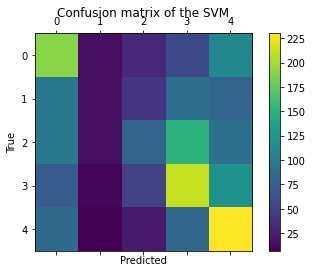

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the SVM')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**after several attempts, the model mostly reach about 35% accuracy, which is slightly 1% lower than without feature engineering and selection. But, keep in mind that the features has been reduced to almost 40% of the original features. So, I think it is a good trade-off between 1% accuracy and the increased training speed**

# **5. Classification Tree**

The metris that I use are :


*   overall accuracy, which is obtained from the total number of correct predictions divided by total number of predictions.
*   precision, which is is the total number of correctly predicted class divided by the total number of that actual class.
*   recall, which is the total number of correctly predicted class divided by the total number of that predicted class

and also confusion matrix to viuslize the result

## **without feature engineering**

### **training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train_scaled, Y_review_score_train)

Y_review_score_predict = clf.predict(X_test_scaled)

### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.38      0.35      0.37       404
         1.0       0.22      0.22      0.22       320
         2.0       0.30      0.31      0.31       428
         3.0       0.37      0.37      0.37       463
         4.0       0.43      0.45      0.44       425

    accuracy                           0.35      2040
   macro avg       0.34      0.34      0.34      2040
weighted avg       0.35      0.35      0.35      2040

confusion matrix:
 [[142  73  66  42  81]
 [ 69  70  77  56  48]
 [ 56  62 134 124  52]
 [ 40  69 111 173  70]
 [ 67  40  53  74 191]] 




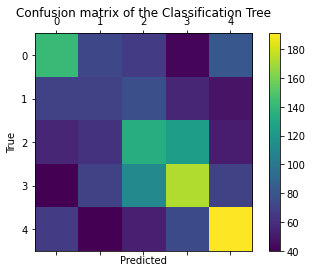

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Classification Tree')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

after several attempts, the model mostly reach about 34% accuracy, which is pretty bad. This could be happened because the randomly selected feature is not strongly related with the review score. But, it is still better than just guessing the review score.

**Compared to other methods, I think classification tree is the best because the recall score for class 1 is not as bad as the other method while the overall accuracy is similar to using svm**

## **with feature engineering**

### **training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(engineered_features_train_review, Y_review_score_train)

Y_review_score_predict = clf.predict(engineered_features_test_review)

### **evaluation**

review range of class x :



,review score range
0,69 -89
1,89 -93
2,93 -96
3,96 -99
4,99 -100


              precision    recall  f1-score   support

         0.0       0.40      0.40      0.40       404
         1.0       0.22      0.26      0.24       320
         2.0       0.31      0.31      0.31       428
         3.0       0.37      0.37      0.37       463
         4.0       0.41      0.35      0.37       425

    accuracy                           0.34      2040
   macro avg       0.34      0.34      0.34      2040
weighted avg       0.35      0.34      0.34      2040

confusion matrix:
 [[162  84  52  51  55]
 [ 63  82  70  58  47]
 [ 65  82 132 103  46]
 [ 49  63 110 172  69]
 [ 71  63  63  80 148]] 




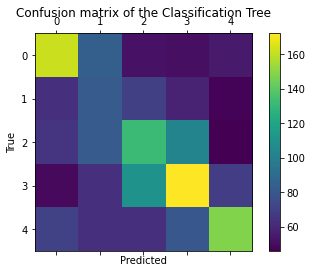

In [ ]:
from IPython.display import display

print("review range of class x :\n")

display(review_bin_details)


from sklearn.metrics import confusion_matrix, classification_report 

report = classification_report(Y_review_score_test, Y_review_score_predict)

print(report)


cm = confusion_matrix( Y_review_score_test, Y_review_score_predict)

print("confusion matrix:\n",cm,"\n\n")

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Classification Tree')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**after several attempts, the model mostly reach about 33% accuracy, which is slightly 1% lower than without feature engineering and selection. But, keep in mind that the features has been reduced to almost 40% of the original features. So, I think it is a good trade-off between 1% accuracy and the increased training speed**

# **6. Gaussian Mixture Model**

For clustering, we will use the principal components instead of the raw features.

Gaussian Mixture Model works by using this algorithm:

1.   Initiate the covariance, means, and mixing coefficients for each clusters
2.   E step: calculate the responsibilites rate for each cluster
3.   M step: adjust the value of covariance, means, and mixing coefficients for each cluster based on the responsibilities rate
4.   Calculate the log likelihood, If it's not converge go to step 2, else stop

In this case I use sklearn library to simplify the process


## **Deciding The Number of cluster**

In this step, we will try to use the davies bouldin score to decide the number of cluster.

In [ ]:
from sklearn.mixture import GaussianMixture

from sklearn.metrics import davies_bouldin_score

bould_score = []

kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2

for k in range(2, kmax+1):

  gmm = GaussianMixture(n_components= k).fit(X_train_scaled_pca)

  labels = gmm.predict(X_train_scaled_pca)

  bould_score.append(davies_bouldin_score(X_train_scaled, labels))

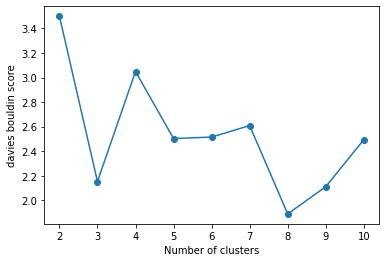

In [ ]:
plt.plot(range(2, kmax+1), bould_score, marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('davies bouldin score')

plt.show()

Based on davies bouldin score, the optimal number of cluster is 4 (local maximum), so we will use 4 clusters

## **Clustering**

In [ ]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=4)
gmm.fit(X_train_scaled_pca)

labels = gmm.predict(X_test_scaled_pca)

print(labels)


[1 0 1 ... 0 2 0]


## **Visualizing The Clusters**

keep in mind that to visualize the cluster, we only use the 2 most important PC. Because we only use 2 out of 91 PC, the results may be hard to interpret, but that's better than not visualizing at all.

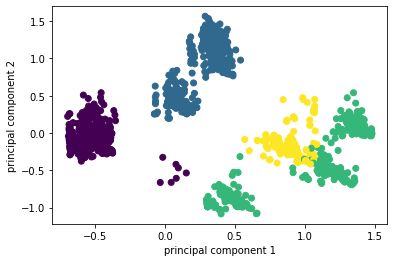

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test_scaled_pca.iloc[:,0], X_test_scaled_pca.iloc[:,1], c = labels)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2");
plt.show()


From the scatter plot above, we could clearly see the clusters seperated from each other. That means our clustering is doing a good job

# **7. K-Means Clustering**

For clustering, we will use the principal components instead of the raw features.

K-Means works by using this algorithm:

1.   Initiate centroids randomly
2.   Calculate the distance of each data points to all cluster
3.   Cluster each data point to the closest centorid
4.   If no data point is changing cluster, stop. Else recalculate the centroid location by averaging the location of all its member and go to step 2

In this case I use sklearn library to simplify the process

## **Deciding The Number of cluster**

Because the data that we want to cluster is the same as using GMM, so we can just use the same number of cluster as the GMM.

So, the number of clusters is 4 as well

## **Clustering**

In [ ]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=4)
km.fit(X_train_scaled_pca)

labels = km.predict(X_test_scaled_pca)

print("the clusters are:", labels)

the clusters are: [3 0 3 ... 0 2 0]


## **Visualizing The Clusters**

keep in mind that to visualize the cluster, we only use the 2 most important PC. Because we only use 2 out of 91 PC, the results may be hard to interpret, but that's better than not visualizing at all.

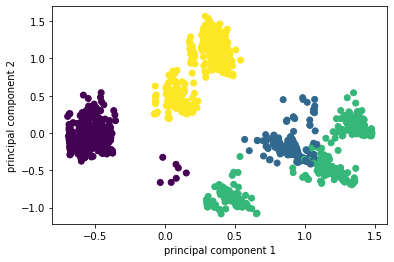

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test_scaled_pca.iloc[:,0], X_test_scaled_pca.iloc[:,1], c = labels)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2");
plt.show()

From the scatter plot above, we could easily identify the clusters, which means our clustering is doing a good job